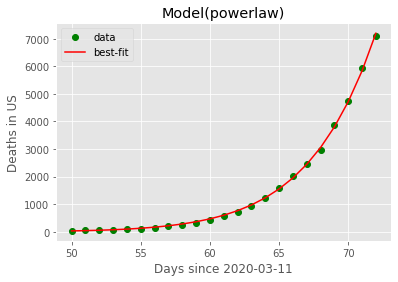

In [9]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from lmfit import models
import os
import sys
sys.path.insert(0, os.path.abspath('../lib'))
import c19all

count_of = 'cases'
country = 'India'
start_date = pd.to_datetime('2020-03-11')

# See https://lmfit.github.io/lmfit-py/builtin_models.html for model options
df = c19all.df_all[count_of]
df = c19all.for_country(df, country) if country else df
df = df[df.day >= 50] if start_date else df
df = df.groupby('day').sum().reset_index()
model = models.PowerLawModel()
params = model.make_params()
result = model.fit(df[count_of], params, x=df.day.to_list())
plt.style.use('ggplot')
xlabel = f'Days since {start_date.strftime("%Y-%m-%d") if start_date else "2020-01-21"}'
ylabel = f'{count_of.capitalize()} in {country}' if country else f'Global {count_of}'
result.plot_fit(xlabel=xlabel, ylabel=ylabel, datafmt='og', fitfmt='r')